In [1]:
# ++++++++++    CHRONIC KIDNEY DISEASE PREDICTION +++++++++++++

# Problem statement:- Predict if a person has a chronic kidney disease based on their features.
# About the Data¶
# They use the following representation to collect the dataset

# id
# age - age
# bp - blood pressure
# sg - specific gravity
# al - albumin
# su - sugar
# rbc - red blood cells
# pc - pus cell
# pcc - pus cell clumps
# ba - bacteria
# bgr - blood glucose random
# bu - blood urea
# sc - serum creatinine
# sod - sodium
# pot - potassium
# hemo - hemoglobin
# pcv - packed cell volume
# wc - white blood cell count
# rc - red blood cell count
# htn - hypertension
# dm - diabetes mellitus
# cad - coronary artery disease
# appet - appetite
# pe - pedal edema
# ane - anemia
# classification - class

In [2]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss #plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from sklearn.ensemble import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [3]:
# Reading Data

data = pd.read_csv('kidney_disease.csv')
data.drop([37,230], axis=0, inplace=True)
#exc = data.loc[data['classification'] == 'ckd\t']
#print(exc)
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  398
Number of features :  26
Features :  ['id' 'age' 'bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc'
 'sod' 'pot' 'hemo' 'pcv' 'wc' 'rc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'classification']


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Data Exploration

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 26 columns):
id                398 non-null int64
age               389 non-null float64
bp                386 non-null float64
sg                352 non-null float64
al                353 non-null float64
su                350 non-null float64
rbc               247 non-null object
pc                334 non-null object
pcc               394 non-null object
ba                394 non-null object
bgr               354 non-null float64
bu                379 non-null float64
sc                381 non-null float64
sod               311 non-null float64
pot               310 non-null float64
hemo              347 non-null float64
pcv               329 non-null object
wc                293 non-null object
rc                269 non-null object
htn               396 non-null object
dm                396 non-null object
cad               396 non-null object
appet             397 non-null object
pe         

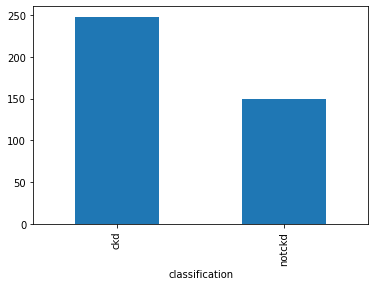

In [5]:
data.groupby('classification')['id'].count().plot.bar()

In [6]:
#Checking whether there are any rows with null values
#nan_rows = data[data.isnull().any(1)]
#print (nan_rows)

In [7]:
# Filling the null values with ' '
#data = data.fillna('')
#nan_rows = data[data.isnull().any(1)]
#print (nan_rows)

In [8]:
# Data Preprocessing
# Dropping the rows having null values

data.dropna(inplace=True)
data.shape

(158, 26)

In [9]:
print(data['rbc'].unique())
print(data['pc'].unique())
print(data['pcc'].unique())
print(data['ba'].unique())
print(data['htn'].unique())
print(data['dm'].unique())
print(data['cad'].unique())
print(data['appet'].unique())
print(data['pe'].unique())
print(data['ane'].unique())
print(data['classification'].unique())

['normal' 'abnormal']
['abnormal' 'normal']
['present' 'notpresent']
['notpresent' 'present']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['poor' 'good']
['yes' 'no']
['yes' 'no']
['ckd' 'notckd']


In [10]:
# Converting the categorical values(object) to categorical values(int)

data['classification'] = data['classification'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [11]:
cnt = data['classification'].value_counts()
print(cnt)

0    115
1     43
Name: classification, dtype: int64


In [12]:
# After dropping rows having null values, we could see the that the number of data points have decreased.
# This is leading to the scenario of class-imbalance.
# To overcome the problem we are introducing SMOTE (synthetic minority oversampling technique), one of the most commonly used oversampling methods to solve the class-imbalance problem.

X = data.iloc[:,:-1]
Y = data['classification']

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

X = pd.DataFrame(X)
Y = pd.Series(Y)
#print(type(Y))

In [13]:
# Test, Train and Cross Validation Split

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, Y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2)

In [14]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 147
Number of data points in test data: 46
Number of data points in cross validation data: 37


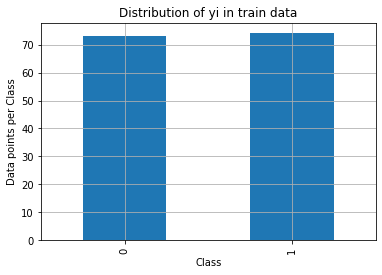

Number of data points in class 2 : 74 ( 50.34 %)
Number of data points in class 1 : 73 ( 49.66 %)
--------------------------------------------------------------------------------


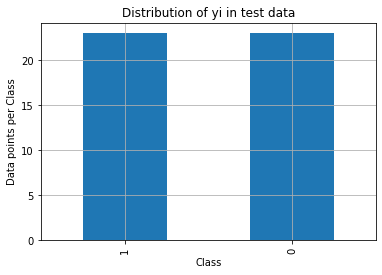

Number of data points in class 1 : 23 ( 50.0 %)
Number of data points in class 2 : 23 ( 50.0 %)
--------------------------------------------------------------------------------


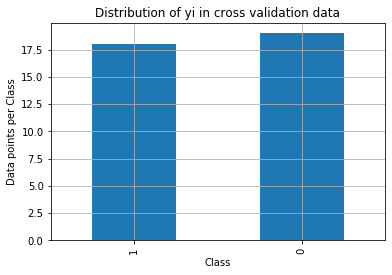

Number of data points in class 2 : 19 ( 51.351 %)
Number of data points in class 1 : 18 ( 48.649 %)


In [15]:
# Distribution of y_i's in Train, Test and Cross Validation datasets

# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_values()
test_class_distribution = y_test.value_counts().sort_values()
cv_class_distribution = y_cv.value_counts().sort_values()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

In [16]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,0]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Cross Validation Data using Random Model 0.8338159953681418
Log loss on Test Data using Random Model 0.7825079191555261


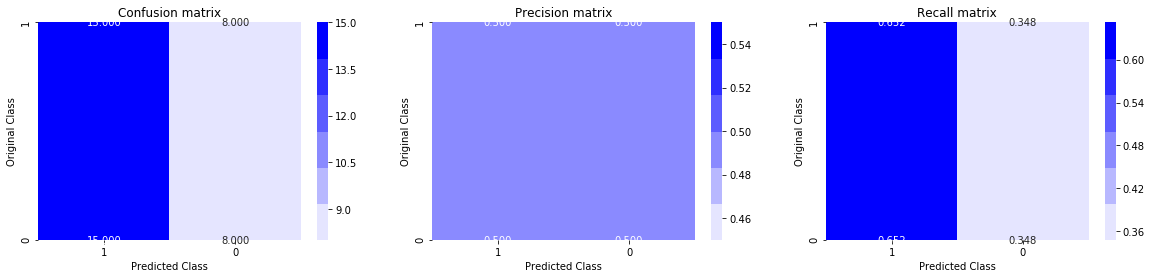

In [17]:
# Prediction using a 'Random' Model

# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)

plot_confusion_matrix(y_test, predicted_y)

for alpha = 1e-05
Log Loss : 0.06180771438789394
for alpha = 0.0001
Log Loss : 0.06180771438789394
for alpha = 0.001
Log Loss : 0.06180771438789394
for alpha = 0.1
Log Loss : 0.06180771438789394
for alpha = 1
Log Loss : 0.061807727010215446
for alpha = 10
Log Loss : 0.08848608512328324
for alpha = 100
Log Loss : 0.16151685765836718
for alpha = 1000
Log Loss : 0.2569998664604779


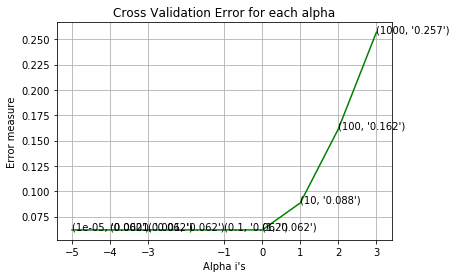

For values of best alpha =  1e-05 The train log loss is: 0.06179448249399633
For values of best alpha =  1e-05 The cross validation log loss is: 0.06180771438789394
For values of best alpha =  1e-05 The test log loss is: 0.06179714325526923


In [18]:
# Base Line Machine Learning Models
# Naive Bayes with Hyper parameter tuning

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)


predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.06179714325526923
Number of missclassified point : 0.0


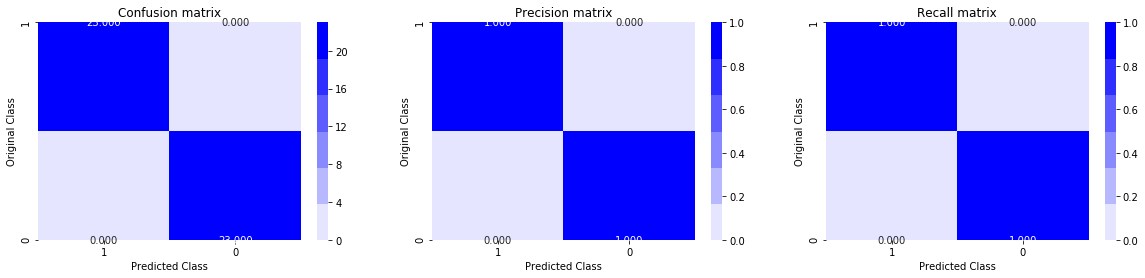

In [19]:
# Testing the model with best hyper paramters

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
#print(type(y_cv)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for alpha = 5
Log Loss : 0.30486701844280684
for alpha = 11
Log Loss : 0.41552704941139373
for alpha = 15
Log Loss : 0.44262845599556966
for alpha = 21
Log Loss : 0.48142987037461815
for alpha = 31
Log Loss : 0.5278342123034655
for alpha = 41
Log Loss : 0.5467833162371338
for alpha = 51
Log Loss : 0.5535322955751045
for alpha = 99
Log Loss : 0.5577140525655023


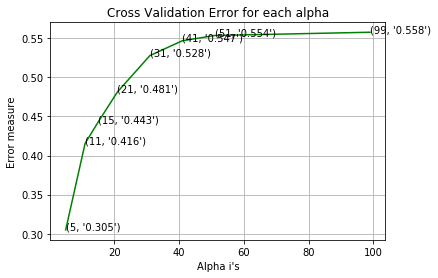

For values of best alpha =  5 The train log loss is: 0.2363372182244601
For values of best alpha =  5 The cross validation log loss is: 0.30486701844280684
For values of best alpha =  5 The test log loss is: 0.4163067120959426


In [20]:
# K Nearest Neighbour Classification with Hyper parameter tuning

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.4163067120959426
Number of missclassified point : 0.21739130434782608


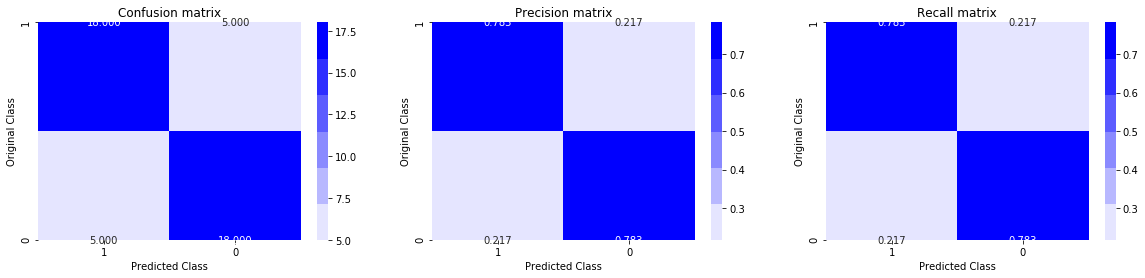

In [21]:
# Testing the model with best hyper paramters

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for alpha = 1e-06
Log Loss : 0.6933423629832294
for alpha = 1e-05
Log Loss : 0.6933423629832294
for alpha = 0.0001
Log Loss : 0.6933423629832294
for alpha = 0.001
Log Loss : 0.6933423629832294
for alpha = 0.01
Log Loss : 0.6933423629832294
for alpha = 0.1
Log Loss : 0.6933423629832294
for alpha = 1
Log Loss : 0.34044881292269386
for alpha = 10
Log Loss : 0.26543596814175247
for alpha = 100
Log Loss : 0.2522542536235974


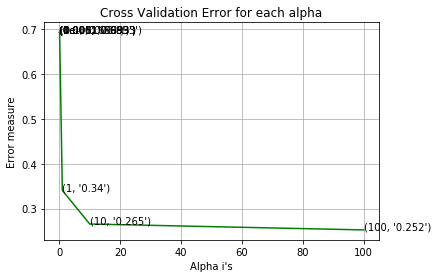

For values of best alpha =  100 The train log loss is: 0.2263284352343714
For values of best alpha =  100 The cross validation log loss is: 0.2522542536235974
For values of best alpha =  100 The test log loss is: 0.20646787702368224


In [22]:
# Logistic Regression with Class balancing & Hyper paramter tuning

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.20646787702368224
Number of missclassified point : 0.0


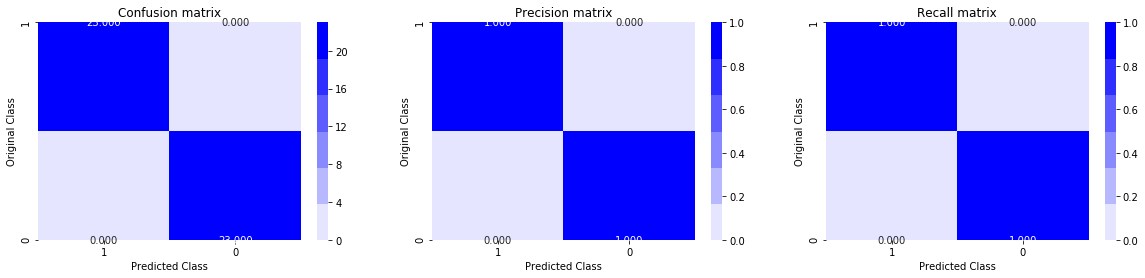

In [23]:
# Testing the model with best hyper paramters

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for alpha = 1e-06
Log Loss : 0.6933423629832294
for alpha = 1e-05
Log Loss : 0.6933423629832294
for alpha = 0.0001
Log Loss : 0.6933423629832294
for alpha = 0.001
Log Loss : 0.6933423629832294
for alpha = 0.01
Log Loss : 0.6933423629832294
for alpha = 0.1
Log Loss : 0.6933423629832294
for alpha = 1
Log Loss : 0.3558508051000081
for alpha = 10
Log Loss : 0.30664177180602986
for alpha = 100
Log Loss : 0.22209582791191662


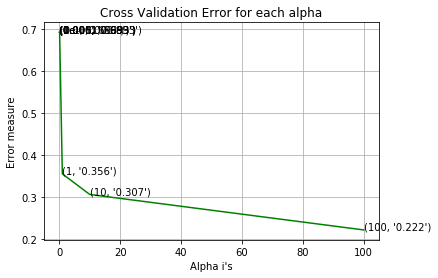

For values of best alpha =  100 The train log loss is: 0.19380157117780034
For values of best alpha =  100 The cross validation log loss is: 0.22209582791191662
For values of best alpha =  100 The test log loss is: 0.1897813377133294


In [24]:
# Logistic Regression with Hyper paramter tuning & without Class balancing

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.18978133771332936
Number of missclassified point : 0.0


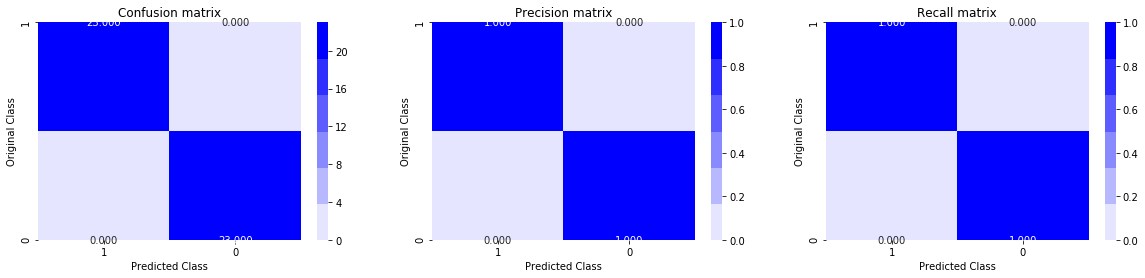

In [25]:
# Testing model with best hyper parameters

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for alpha = 1e-06
Log Loss : 0.6933423629832294
for alpha = 1e-05
Log Loss : 0.6933423629832294
for alpha = 0.0001
Log Loss : 0.6933423629832294
for alpha = 0.001
Log Loss : 0.6933423629832294
for alpha = 0.01
Log Loss : 0.6933423629832294
for alpha = 0.1
Log Loss : 0.6933423629832294
for alpha = 1
Log Loss : 0.43348436382131517
for alpha = 10
Log Loss : 0.2549887814836132
for alpha = 100
Log Loss : 0.3684815101586802


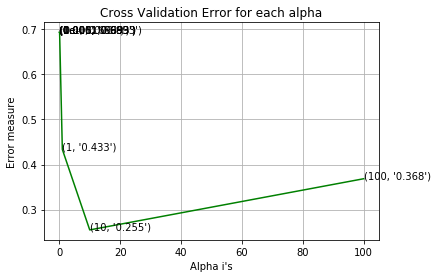

For values of best alpha =  10 The train log loss is: 0.2527557753855606
For values of best alpha =  10 The cross validation log loss is: 0.2549887814836132
For values of best alpha =  10 The test log loss is: 0.22423829916445276


In [26]:
# Linear Support Vector Machines with Hyper paramter tuning

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.22423829916445276
Number of missclassified point : 0.0


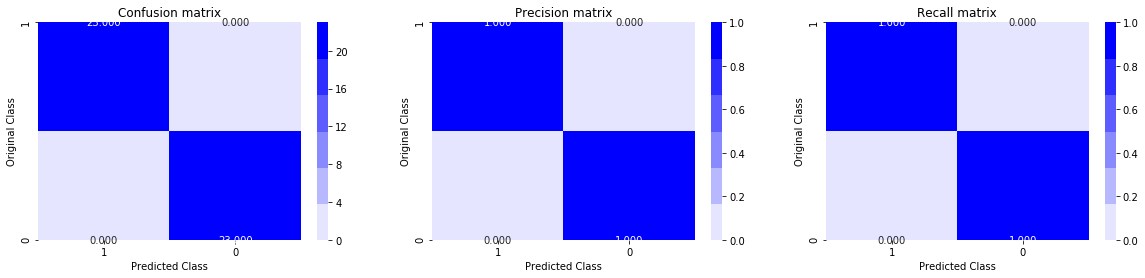

In [27]:
# Testing model with best hyper parameters

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for n_estimators = 100 and max depth =  5
Log Loss : 0.07840947812871576
for n_estimators = 100 and max depth =  10
Log Loss : 0.07840947812871576
for n_estimators = 200 and max depth =  5
Log Loss : 0.07812433080746688
for n_estimators = 200 and max depth =  10
Log Loss : 0.07812433080746688
for n_estimators = 500 and max depth =  5
Log Loss : 0.07654917037979045
for n_estimators = 500 and max depth =  10
Log Loss : 0.07654917037979045
for n_estimators = 1000 and max depth =  5
Log Loss : 0.07611837063844247
for n_estimators = 1000 and max depth =  10
Log Loss : 0.07611837063844247
for n_estimators = 2000 and max depth =  5
Log Loss : 0.07426925893963013
for n_estimators = 2000 and max depth =  10
Log Loss : 0.07426901653688618


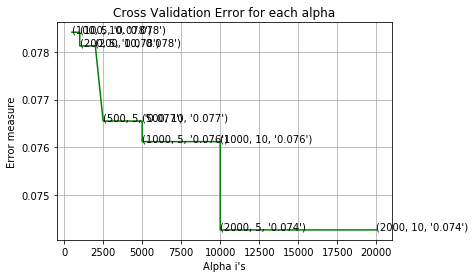

For values of best estimator =  2000 The train log loss is: 0.060429970359048166
For values of best estimator =  2000 The cross validation log loss is: 0.07426901653688618
For values of best estimator =  2000 The test log loss is: 0.06125204981553893


In [28]:
# Random Forest Classifier with Hyper paramter tuning

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.06125204981553893
Number of missclassified point : 0.0


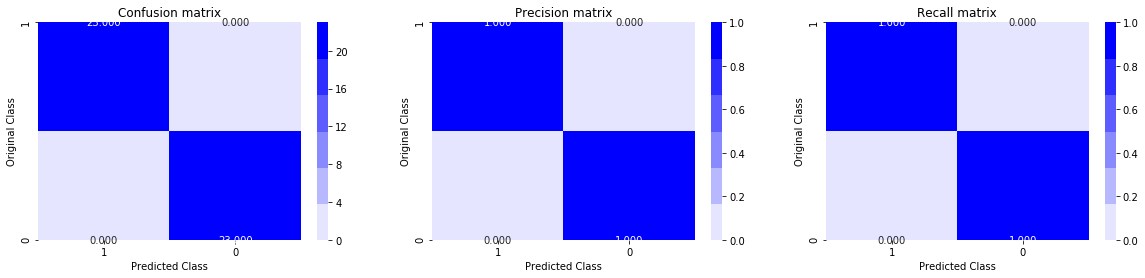

In [29]:
# Testing model with best hyper parameters 

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(test_df)
print("Log Loss :",log_loss(y_test, predict_y))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_df)- y_test))/y_test.shape[0])

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [30]:
# Final Observation:- Now, we will list down the all the previously used model with the corresponding train log loss
#                     & test log loss accordingly. Through this, we will get to know the model providing the minimum loss &
#                     maximum performance.

# 1> 'Random' model is producing Cross Validation loss: 0.8338159953681418 & Test Loss: 0.7825079191555261

# 2> Naive Bayes (with best alpha = 1e-05) is producing Train loss: 0.06179448249399633 & Test Loss: 0.06179714325526923
# 3> K Nearest Neighbour Classification (with best alpha = 5) is producing Train loss: 0.2363372182244601 & Test Loss: 0.4163067120959426
# 4> Logistic Regression with Class balancing (with best alpha = 100) is producing Train loss: 0.2263284352343714 & Test Loss: 0.20646787702368224
# 5> Logistic Regression without Class balancing (with best alpha = 100) is producing Train loss: 0.19380157117780034 & Test Loss: 0.1897813377133294
# 6> Linear Support Vector Machines (with best alpha = 10) producing Train loss: 0.2527557753855606 & Test Loss: 0.22423829916445276
# 7> Random Forest Classifier (with best alpha = 1000) producing Train loss: 0.060429970359048166 & Test Loss: 0.06125204981553893

# ********************************************************************************** #
# After looking into the train as well as thr test log loss of the models used in this project,
# if we compare the the indivisual model performance, below will be the outcome.

# Random Forest Classifier>Naive Bayes>Logistic Regression without Class balancing>Logistic Regression with Class balancing>Linear Support Vector Machines>K Nearest Neighbour Classification>'Random' model.

# ************************************************************************************* #

# Apart from these models, we could use lightGBM, XGBoost, StackingClassifier etc & measure the performance of the indivisual ones in the same way.